In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

excel_file = 'PoonerynOriginal.xlsx'
pooneryn = pd.read_excel(excel_file)
pooneryn.head(5)




,timestamp,C1-Thies @79m ESE Average,C1-Thies 4.3303(m/s) @79m ESE-10 Min Max Value,C1-Thies 4.3303(m/s) @79m ESE-10 Min Min Value,C2-Thies @79m WNW Average,C2-Thies 4.3303(m/s) @79m WNW-10 Min Max Value,C2-Thies 4.3303(m/s) @79m WNW-10 Min Min Value,height 79m,C3-Thies @60m ESE Average,C3-Thies 4.3303(m/s) @60m ESE-10 Min Max Value,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,2015-02-23 00:00:01,5.55,7.21,3.59,5.59,7.26,3.41,5.57,4.71,6.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-23 00:10:01,5.68,6.94,3.91,5.72,6.96,4.07,5.70,5.01,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-23 00:20:01,6.07,7.40,4.23,6.11,7.61,4.85,6.09,5.43,6.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-23 00:30:01,5.48,7.14,2.58,5.52,6.85,2.33,5.50,4.92,6.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-23 00:40:01,5.44,6.48,2.67,5.44,6.67,3.04,5.44,4.96,6.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


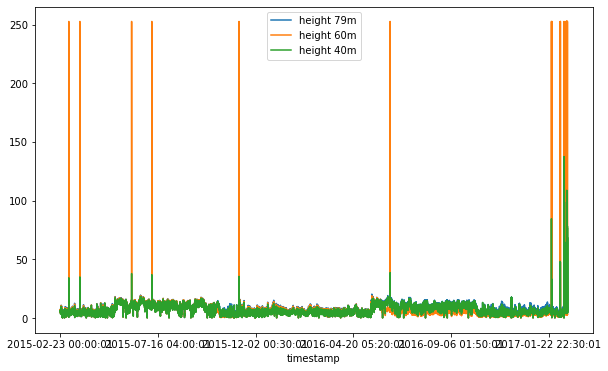

In [28]:

poonIndexed = pooneryn.set_index(['timestamp'])
from datetime import datetime
poonIndexed.head(5)
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]
pooneryn.plot(y=['height 79m','height 60m','height 40m'], x='timestamp')


False


In [32]:
energy = pd.read_excel('energy.xlsx')
energy.index = pd.to_datetime(energy['Year'], format='%Y-%m-%d').dt.year
from datetime import datetime
energy.head(5)

,Year,Annual Energy /MWh
Year,,
1970,1998,8184.82
1970,1999,8184.65
1970,2000,8184.51
1970,2001,8184.39
1970,2002,8184.28


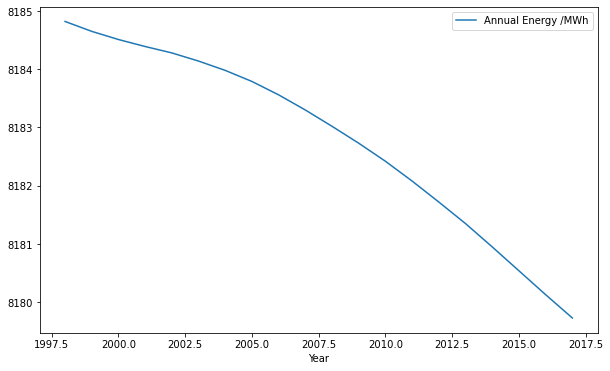

In [33]:
plt.rcParams["figure.figsize"] = [10, 6]
energy.plot(y='Annual Energy /MWh', x='Year')

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)